# Basic Keras

In [1]:
import tensorflow as tf
import numpy as np

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils


#preparing data for Exclusive OR (XOR)

attributes = [
    #x1, x2
    [0 ,0]
  , [0, 1]
  , [1, 0]
  , [1, 1]
]

labels = [
    #is_0, is_1 -> only a column can be 1 in labels variable
    [1, 0] 
  , [0, 1]
  , [0, 1]
  , [1, 0]
]

#transforming attributes and labels matrixes to numpy
data = np.array(attributes, 'int64')
target = np.array(labels, 'int64')


#creating model

model = Sequential()


#  input layer to 1st hidden layer
model.add(Dense(units=3 , input_shape=(2,))) #num of features in input layer

# Dense default setting:
# kernel_initializer='glorot_uniform', bias_initializer='zeros'
# common kernel_initializer: 'glorot_uniform'/

model.add(Activation('relu')) #activation function from input layer to 1st hidden layer
# common activation: 'relu'/'sigmoid'/'tanh'/'LeakyReLU'

#  1st hidden layer to 2end hidden layer
model.add(Dense(units=3))
model.add(Activation('relu')) #activation function from 1st hidden layer to 2end hidden layer


#  2end hidden layer to output layer
model.add(Dense(units=2)) #num of classes in output layer
model.add(Activation('softmax')) #activation function from 2end hidden layer to output layer

# summary model
model.summary()

#compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# different setting on compile
# loss='mean_squared_error'/'categorical_crossentropy'/'binary_crossentropy'
# optimizer='sgd'/'adam'/'rmsprop'
# metrics='accuracy'/'mse'

#training
score = model.fit(data, target, epochs=100)
#verbose: 0, 1 或 2。日志显示模式。 0 = 安静模式, 1 = 进度条, 2 = 每轮一行。

C:\Users\brian\Anaconda3\envs\python_37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\brian\Anaconda3\envs\python_37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\brian\Anaconda3\envs\python_37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\brian\Anaconda3\envs\python_37\lib\site-packages\ten

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
_________________________________________________________________
activation_3 (Activation)    (None, 2)                 0         
Total params: 29
Trainable params: 29
Non-trainable params: 0
__________________________________________________________

Epoch 69/100
4/4 [==============================] - 0s 249us/step - loss: 0.6793 - accuracy: 0.7500
Epoch 70/100
4/4 [==============================] - 0s 250us/step - loss: 0.6792 - accuracy: 0.7500
Epoch 71/100
4/4 [==============================] - 0s 350us/step - loss: 0.6790 - accuracy: 0.7500
Epoch 72/100
4/4 [==============================] - 0s 499us/step - loss: 0.6789 - accuracy: 0.7500
Epoch 73/100
4/4 [==============================] - 0s 250us/step - loss: 0.6788 - accuracy: 0.7500
Epoch 74/100
4/4 [==============================] - 0s 249us/step - loss: 0.6787 - accuracy: 0.7500
Epoch 75/100
4/4 [==============================] - 0s 249us/step - loss: 0.6785 - accuracy: 0.7500
Epoch 76/100
4/4 [==============================] - 0s 249us/step - loss: 0.6784 - accuracy: 0.7500
Epoch 77/100
4/4 [==============================] - 0s 252us/step - loss: 0.6783 - accuracy: 0.7500
Epoch 78/100
4/4 [==============================] - 0s 249us/step - loss: 0.6781 - accuracy: 0.7500


Loss function:  
binary_crossentropy (2 classes)  
categorical_crossentropy (>2 classes)  

## MNIST
MNIST is a computer vision dataset. It consists of black and white images from zero to nine. Each image is 28 * 28 and have been flatten to 784 dimension vector. Also, it includes labels for each image, telling us which digit it is.

![Alt text](./images/dnn_implement/Selection_017.png)
![Alt text](./images/dnn_implement/Selection_018.png)



# MNIST Dataset - training and save model

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)

11493376/11490434 [==============================] - 7s 1us/step
(60000, 28, 28)
(60000,)


In [3]:
from matplotlib import pyplot as plt
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

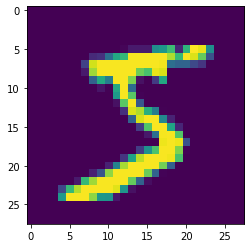

In [4]:
plt.imshow(train_images[0])
plt.show() 

In [5]:
# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax'),
])

# Summary model
model.summary()

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
train_history = model.fit(
  x=train_images,
  y=to_categorical(train_labels),
  validation_split=0.2,
  epochs=5,
  batch_size=32,
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 116us/step - loss: 0.2882 - accuracy: 0.9160 - val_loss: 0.1394 - val_accuracy: 0.9588
Epoch 2/5
48000/48000 [==============================] - 5s 110us/step - loss: 0.1278 - accuracy: 0.9616 - val_loss: 0.1238 - val_accuracy: 0.9626
Epoch 3/5
48000/48000 [=============

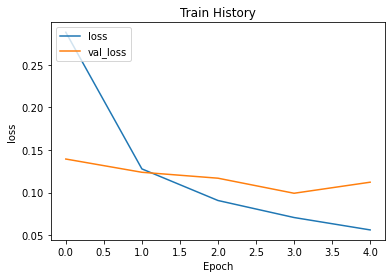

In [6]:
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

In [7]:
# Evaluate the model.
test_loss, test_acc = model.evaluate(test_images, to_categorical(test_labels))

print('test accuracy is {}'.format(test_acc))

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]'''

# Save the model to disk.
model.save('model.h5')

10000/10000 [==============================] - 0s 38us/step
test accuracy is 0.9692000150680542
[7 2 1 0 4]
[7 2 1 0 4]


# MNIST Dataset - load model and testing

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from keras.models import load_model


(_, _), (test_images, test_labels) = mnist.load_data()

x_test = test_images.reshape((10000, 28 * 28)) 
x_test = x_test.astype('float32') / 255      
y_test  = to_categorical(test_labels)


model = load_model('model.h5')  

test_loss, test_acc = model.evaluate(x_test, y_test) 
print('test accuracy is {}'.format(test_acc))

# Predict on the first 5 test images.
predictions = model.predict(x_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(y_test[:5]) # [7, 2, 1, 0, 4]'''



10000/10000 [==============================] - 0s 37us/step
test accuracy is 0.9692000150680542
[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Dropout

In [9]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils


batch_size = 128
nb_classes = 10
nb_epoch = 20

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))
# add dropout
model.add(Dropout(0.3))

model.add(Dense(512))
model.add(Activation('relu'))
# add dropout
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))


score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])


60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)

C:\Users\brian\Anaconda3\envs\python_37\lib\site-packages\ipykernel_launcher.py:55: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.2966 - accuracy: 0.9078 - val_loss: 0.1297 - val_accuracy: 0.9613
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.1340 - accuracy: 0.9599 - val_loss: 0.0959 - val_accuracy: 0.9706
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1028 - accuracy: 0.9691 - val_loss: 0.0895 - val_accuracy: 0.9726
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.0871 - accuracy: 0.9732 - val_loss: 0.0766 - val_accuracy: 0.9793
Epoch 5/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.0760 - accuracy: 0.9778 - val_loss: 0.0842 - val_accuracy: 0.9782
Epoch 6/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0681 - accuracy: 0.9796 - val_loss: 0.0708 - val_accuracy: 0.9804
Epoch 7/20
60000/60000 [==============================] - 4s 73us/st

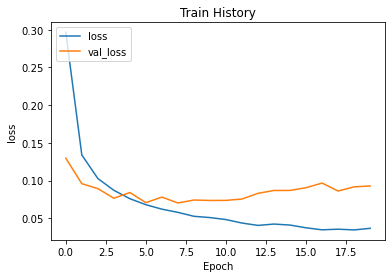

In [10]:
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

# Regression

In [11]:
from keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

print(X_train[0])

57344/57026 [==============================] - 0s 4us/step
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [12]:
print(y_train[0])

15.2


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

In [15]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100)

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 0s 1ms/step - loss: 591.8293 - mae: 22.6116 - val_loss: 654.3442 - val_mae: 23.9187
Epoch 2/100
323/323 [==============================] - 0s 90us/step - loss: 580.2683 - mae: 22.3572 - val_loss: 644.7691 - val_mae: 23.7223
Epoch 3/100
323/323 [==============================] - 0s 74us/step - loss: 570.9208 - mae: 22.1559 - val_loss: 635.9067 - val_mae: 23.5414
Epoch 4/100
323/323 [==============================] - 0s 84us/step - loss: 562.1471 - mae: 21.9668 - val_loss: 626.8533 - val_mae: 23.3566
Epoch 5/100
323/323 [==============================] - 0s 80us/step - loss: 553.2818 - mae: 21.7748 - val_loss: 617.2855 - val_mae: 23.1623
Epoch 6/100
323/323 [==============================] - 0s 88us/step - loss: 543.9507 - mae: 21.5784 - val_loss: 607.3671 - val_mae: 22.9594
Epoch 7/100
323/323 [==============================] - 0s 79us/step - loss: 534.2318 - mae: 21.3706 - val_loss: 597.

In [16]:
model.evaluate(X_test_scaled, y_test)
# output values represent the loss(MSE) and the metrics(MAE)


102/102 [==============================] - 0s 63us/step


[27.78502991620232, 4.09093713760376]

In [17]:
to_predict = X_test_scaled[:2]
predictions = model.predict(to_predict)
print(predictions)

[[13.933856]
 [17.02238 ]]


In [18]:
print(y_test[:2])

[ 7.2 18.8]
